In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stellar-classification-dataset-sdss17")

dataset = pd.read_csv(f"{path}/{os.listdir(path)[0]}")
dataset.head()

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
print(f"Total duplicates values in dataset: {dataset[dataset.duplicated()].shape[0]}")

Total duplicates values in dataset: 0


In [4]:
dataset.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [5]:
dataset.rename(columns={"class": "y"}, inplace=True)

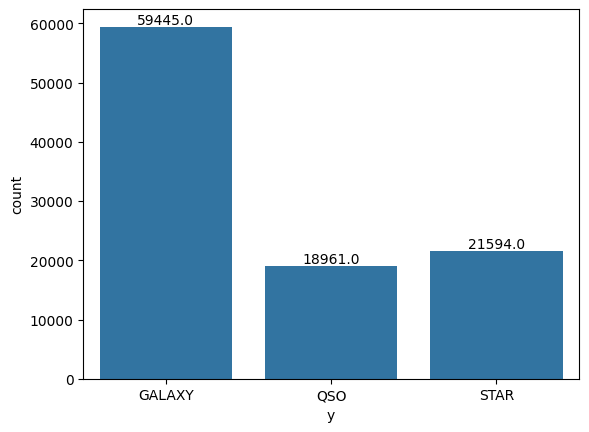

In [6]:
import seaborn as sns

ax = sns.countplot(x="y", data=dataset)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(p.get_height(), (x, y), ha="center", va="bottom")

In [7]:
print(f"Dataset size: {dataset.shape[0]}")

Dataset size: 100000


In [8]:
dataset.drop(columns=["obj_ID"], axis=1, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset["y"] = encoder.fit_transform(dataset["y"])

In [10]:
dataset.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,y,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.621490,0.576661,5137.009660,55588.647500,449.312740
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.816778,0.730707,2952.303351,1808.484233,272.498404
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,0.000000,-0.009971,266.000000,51608.000000,1.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.000000,0.054517,2526.000000,54234.000000,221.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.000000,0.424173,4987.000000,55868.500000,433.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,1.000000,0.704154,7400.250000,56777.000000,645.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,2.000000,7.011245,12547.000000,58932.000000,1000.000000


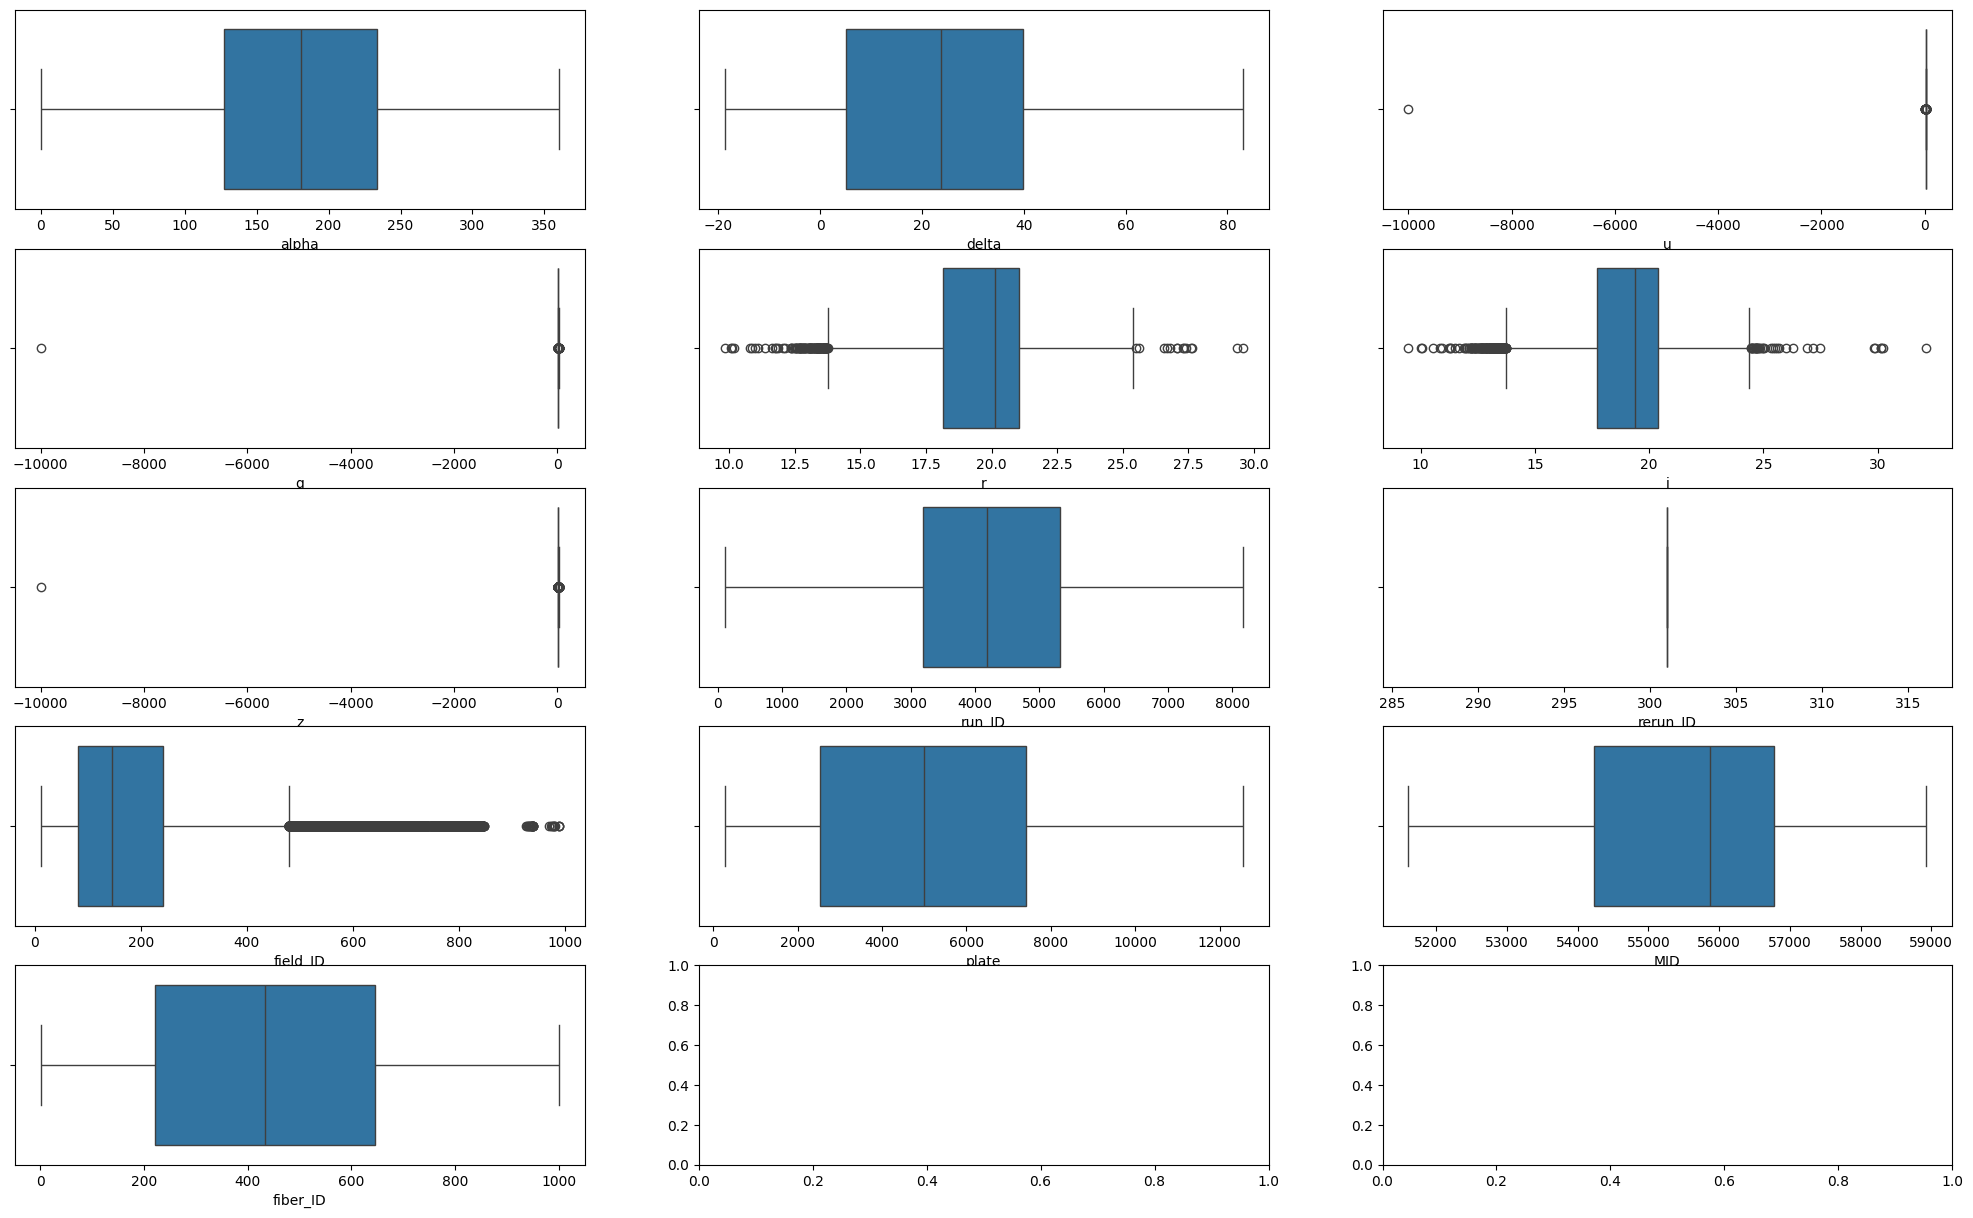

In [11]:
from matplotlib import pyplot as plt

_, axes = plt.subplots(5, 3, figsize=(25, 15), dpi=100)

numerical_columns = [
    "alpha", "delta", "u", "g", "r", "i", "z", "run_ID", "rerun_ID", "field_ID",
    "plate", "MJD", "fiber_ID"
]
col = 0
row = 0
for column in numerical_columns:
    _ = sns.boxplot(x=column, data=dataset, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

In [12]:
dataset.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,y,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.621490,0.576661,5137.009660,55588.647500,449.312740
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.816778,0.730707,2952.303351,1808.484233,272.498404
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,0.000000,-0.009971,266.000000,51608.000000,1.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.000000,0.054517,2526.000000,54234.000000,221.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.000000,0.424173,4987.000000,55868.500000,433.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,1.000000,0.704154,7400.250000,56777.000000,645.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,2.000000,7.011245,12547.000000,58932.000000,1000.000000


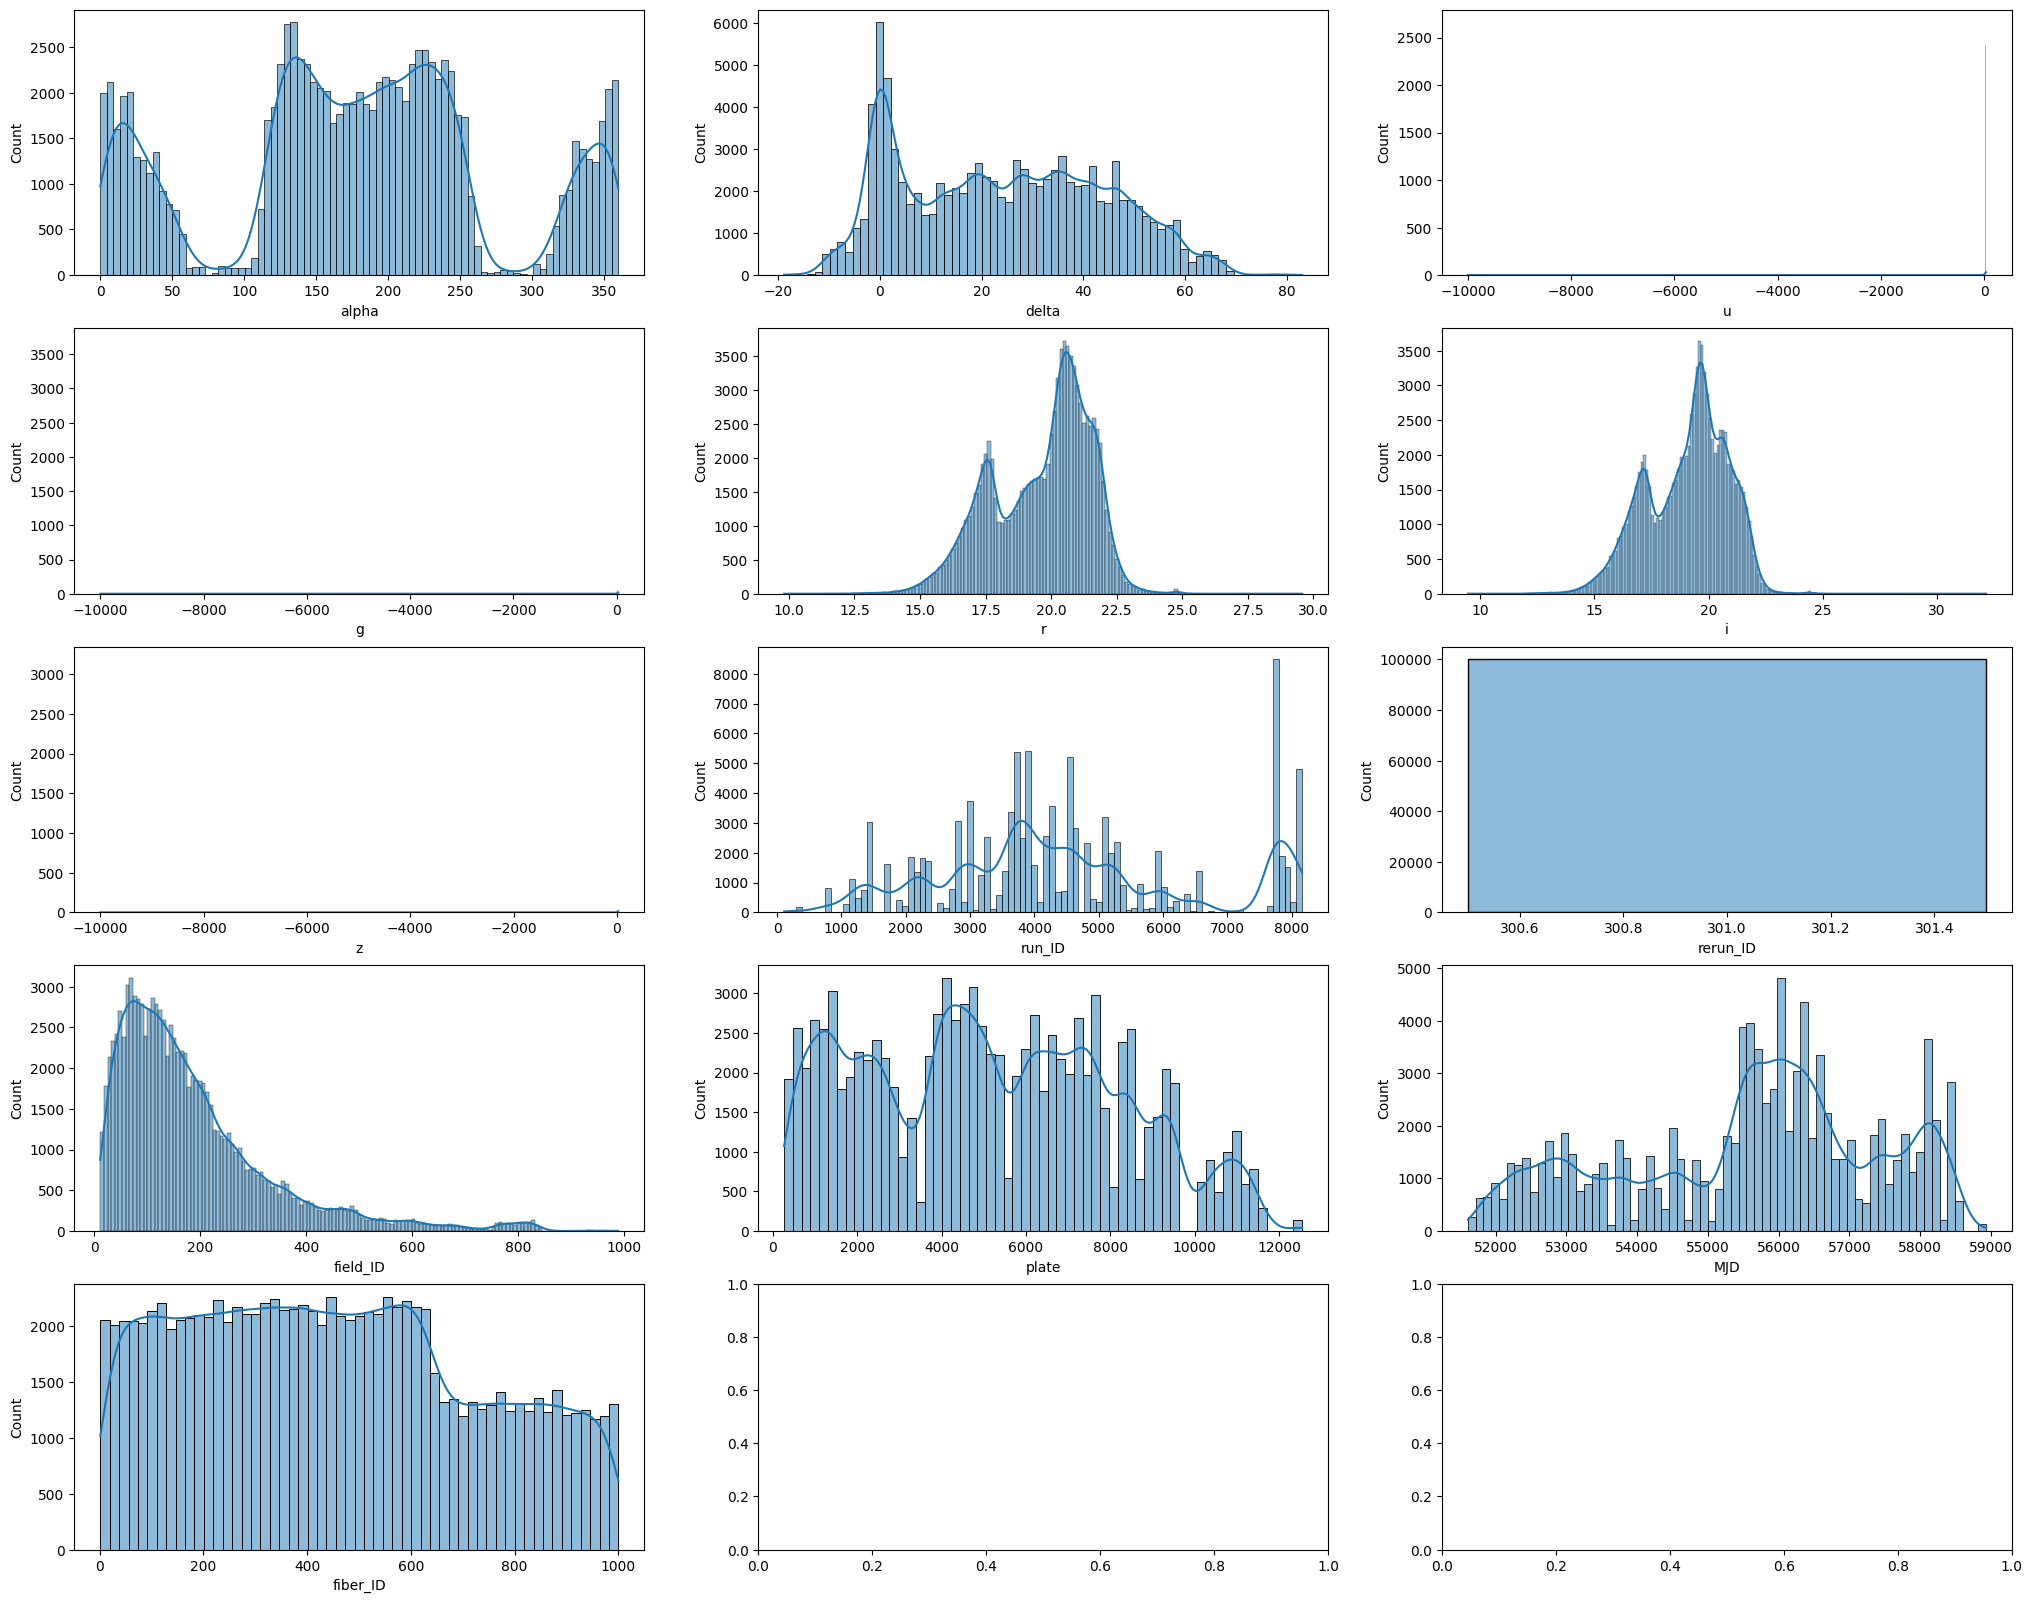

In [13]:
_, axes = plt.subplots(5, 3, figsize=(25, 20), dpi=100)

col = 0
row = 0
for column in numerical_columns:
    _ = sns.histplot(x=column, data=dataset, kde=True, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [15]:
dataset.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,y,redshift,plate,MJD,fiber_ID
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.0,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,-3.970513e-16,1.173817e-16,2.279066e-17,2.815526e-17,4.587974e-16,-2.325322e-15,-4.646949e-17,-1.426770e-16,0.0,3.511610,7.332801e-17,5.783882e+18,0.621490,0.576661,9.642065e-17,4.828848e-16,-7.688072e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.0,1.586912,1.000005e+00,3.324016e+18,0.816778,0.730707,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.840625e+00,-2.184860e+00,-3.154314e+02,-3.155745e+02,-5.296504e+00,-5.469610e+00,-3.157360e+02,-2.225400e+00,0.0,1.000000,-1.175291e+00,2.995191e+17,0.000000,-0.009971,-1.649910e+00,-2.201107e+00,-1.645202e+00
25%,-5.192744e-01,-9.666048e-01,-5.124836e-02,-4.932757e-02,-8.140905e-01,-7.694294e-01,-3.807782e-02,-6.587927e-01,0.0,2.000000,-6.988141e-01,2.844138e+18,0.000000,0.054517,-8.844019e-01,-7.490551e-01,-8.378540e-01
50%,3.390180e-02,-2.491184e-02,6.253452e-03,1.790380e-02,2.585404e-01,1.822022e-01,1.058323e-02,-1.493143e-01,0.0,4.000000,-2.693137e-01,5.614883e+18,0.000000,0.424173,-5.081131e-02,1.547450e-01,-5.986392e-02
75%,5.830556e-01,8.025754e-01,5.373051e-02,5.015351e-02,7.542917e-01,7.461467e-01,3.947018e-02,4.298928e-01,0.0,5.000000,3.682260e-01,8.332144e+18,1.000000,0.704154,7.666054e-01,6.571019e-01,7.181262e-01
max,1.889817e+00,2.996514e+00,3.399816e-01,3.486868e-01,5.351716e+00,7.427453e+00,3.377122e-01,1.873330e+00,0.0,6.000000,5.388012e+00,1.412694e+19,2.000000,7.011245,2.509914e+00,1.848714e+00,2.020893e+00


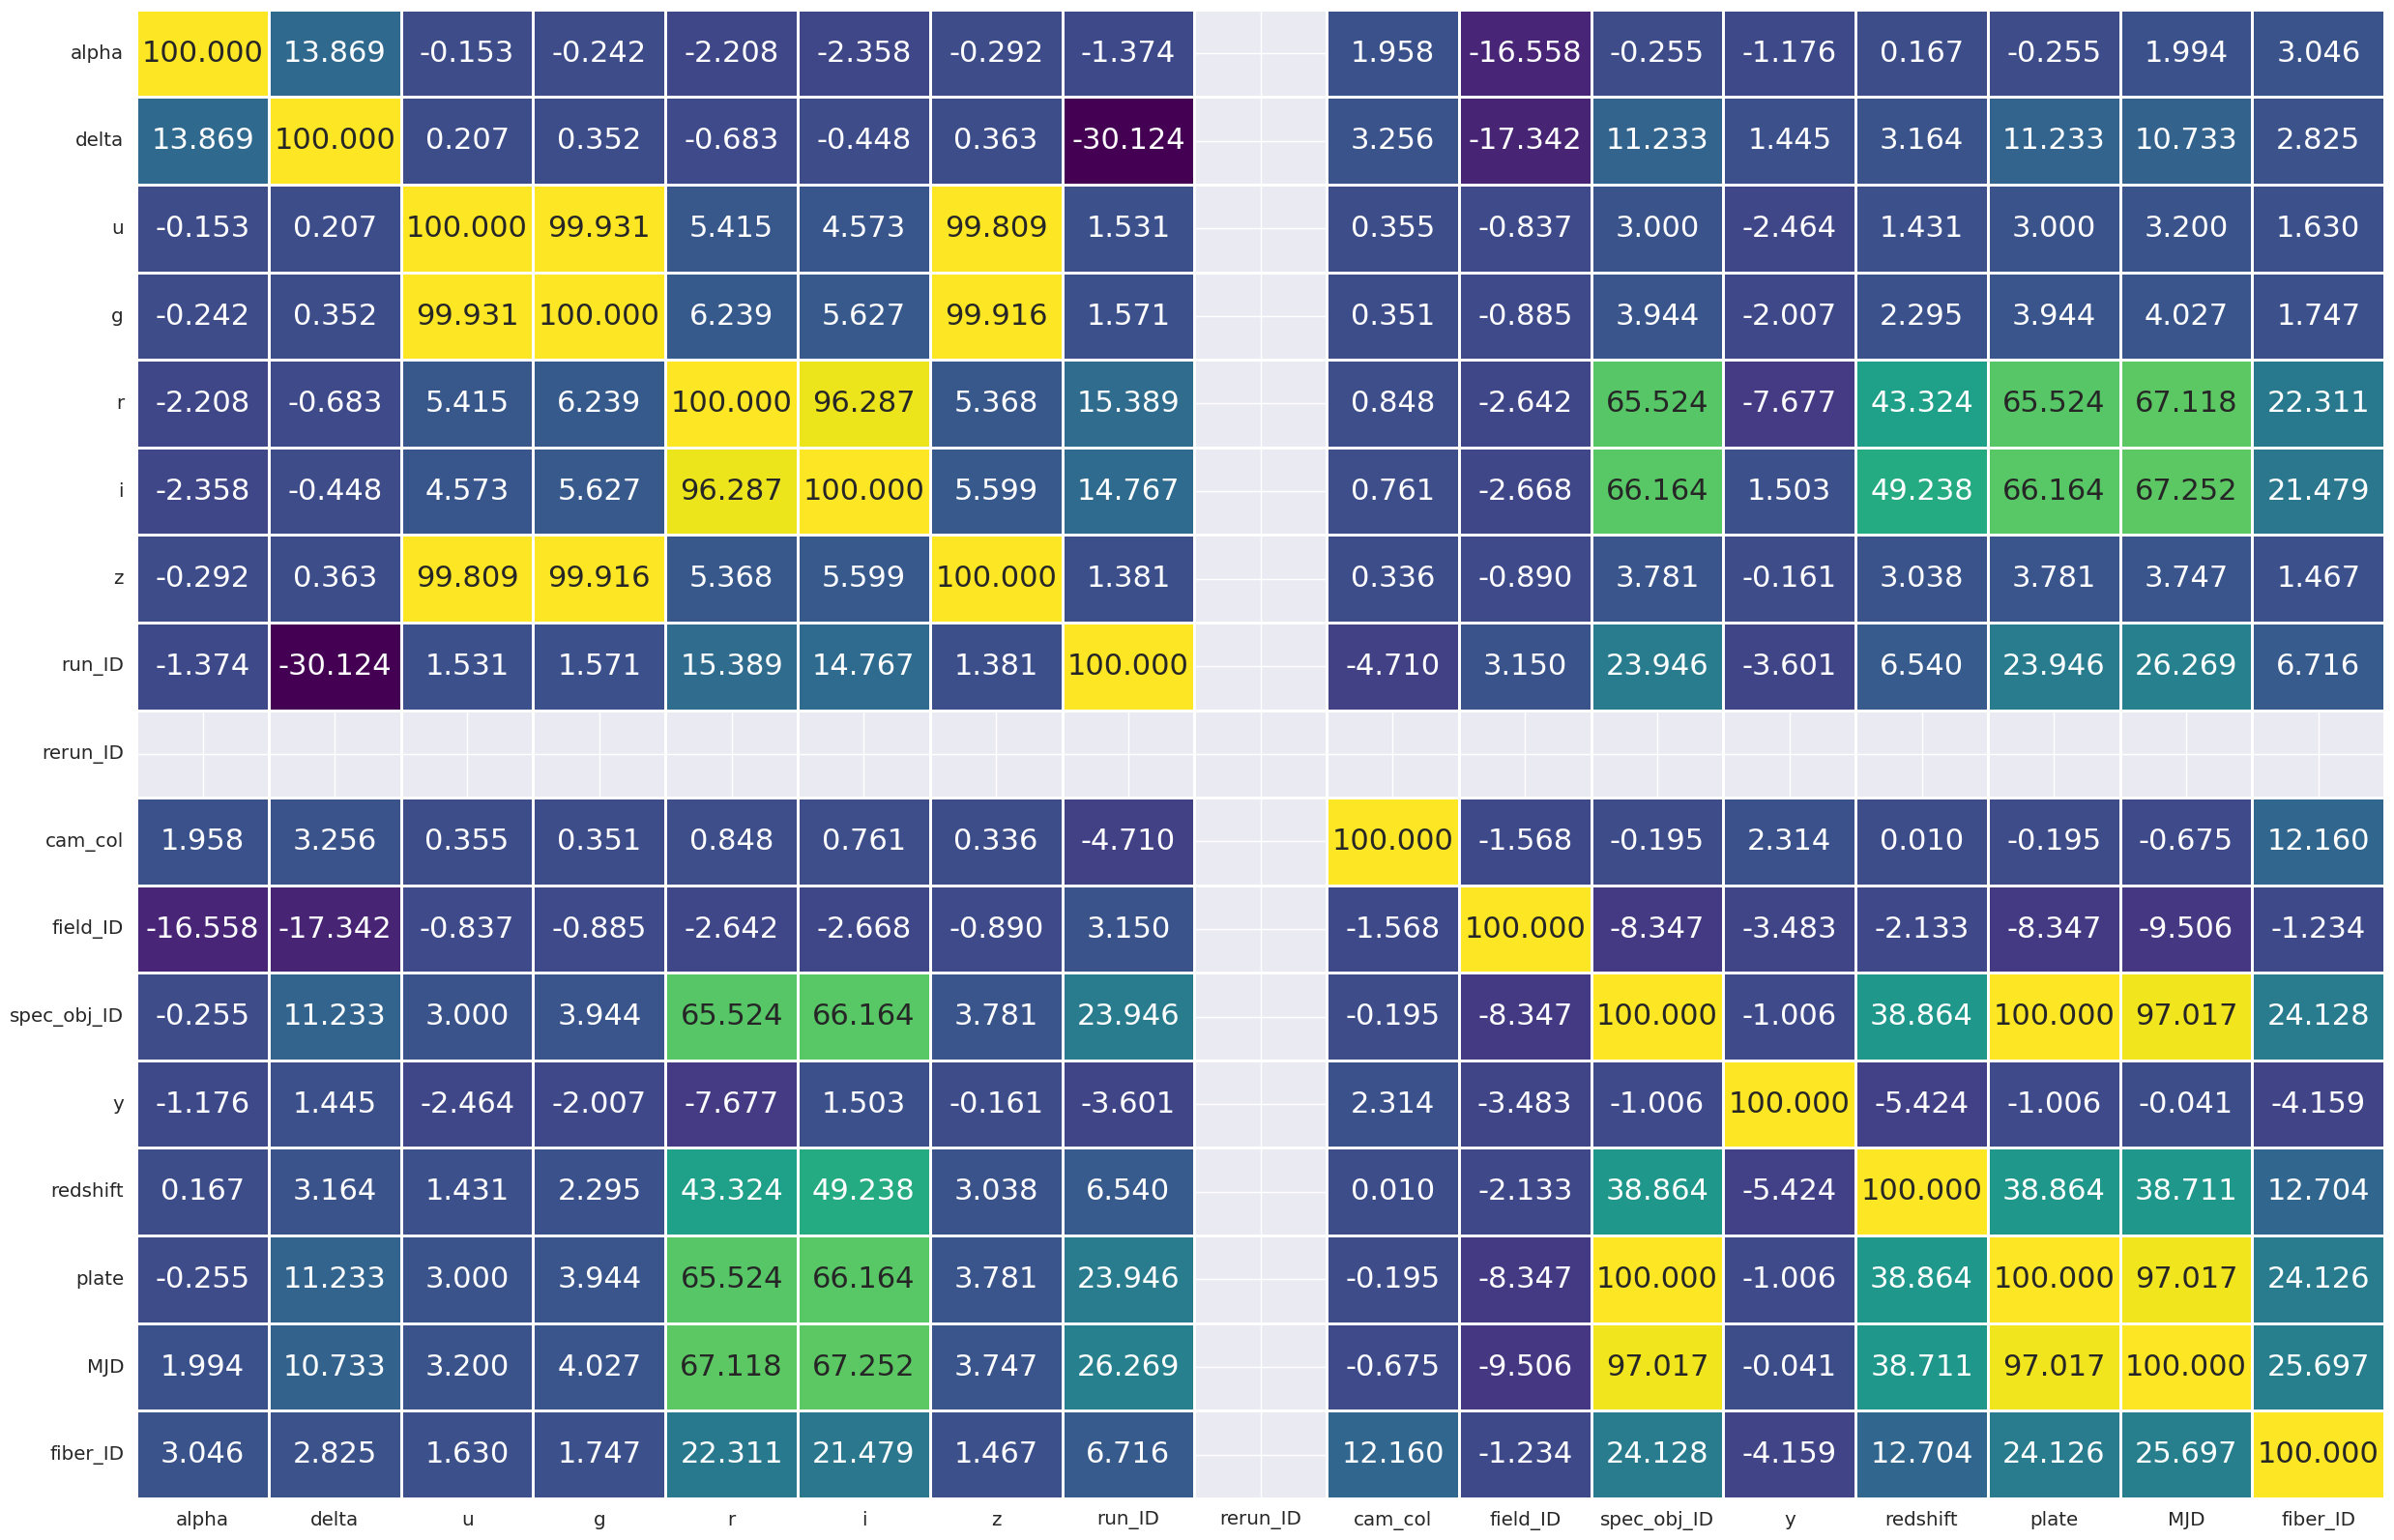

In [16]:
plt.figure(figsize=(30, 20), dpi=100) 
sns.set_theme(font_scale=1.3)

corr_map = dataset.corr() * 100
_ = sns.heatmap(
    corr_map, annot=True, annot_kws={"fontsize": 22}, linecolor="white",
    linewidth=1, fmt=".3f", cmap="viridis", cbar=False
)

In [17]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["y"], axis=1, inplace=False)
y = dataset[["y"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

print(f"Train dataset size: {X_train.shape[0]}")
print(f"Test dataset size: {X_test.shape[0]}")

Train dataset size: 80000
Test dataset size: 20000


In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="log_loss", splitter="best",
    max_depth=10, max_features=X_train.shape[1],
    random_state=42,
)
model.fit(X_train, y_train, check_input=True)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features=16,
                       random_state=42)

In [19]:
model.score(X_test, y_test)

0.97675

In [20]:
from sklearn.metrics import balanced_accuracy_score as BAS

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"Train dataset balanced accuracy: {BAS(y_train, y_train_pred, adjusted=True) * 100:.4f}")
print(f"Test dataset balanced accuracy: {BAS(y_test, y_test_pred, adjusted=True) * 100:.4f}")

Train dataset balanced accuracy: 96.5673
Test dataset balanced accuracy: 95.5894


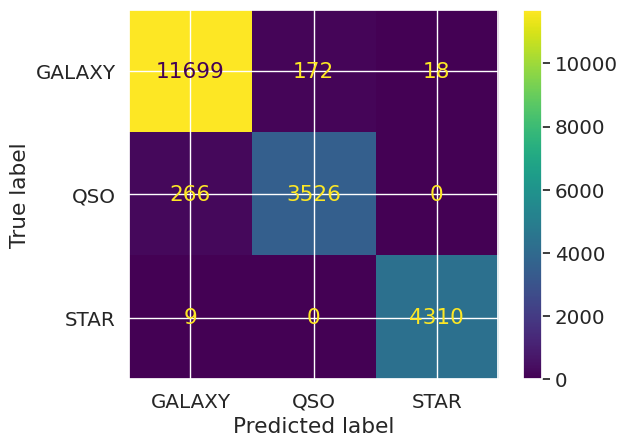

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_test_pred),
    display_labels=encoder.inverse_transform(model.classes_)
).plot()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11889
           1       0.95      0.93      0.94      3792
           2       1.00      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

